In [1]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/data analysis 2024/LyA/commands')
sys.path.append('/eos/home-i00/l/lkoller/data-analysis-software/')

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from matplotlib.gridspec import GridSpec
import os
from Lfile import Lfile
from Ldate import Ldate
import math
from readTrc_4CH import Trc
from scipy.optimize import curve_fit
from tqdm import tqdm
from Waveform import wf
from PIL import Image
from Ltif import Lpicday, Lpic
from LyAdata24 import read_df
from gbarDataLoader24 import loadElena
from cluster_finder import cfinder

In [2]:
date = '24_06_20'
datafile = pd.read_csv('/eos/user/l/lkoller/GBAR/data24/datafile24.txt', delimiter = '\t')
datapath = Path('/eos/experiment/gbar/pgunpc/data/' + date)
fl = [str(datapath) + '/' + val for val in os.listdir(datapath) if val.endswith('.tif') and (val.startswith('VCXG') or 'BAU-TRK') and not (val[0] == '.' or val[-7:-4] == 'ped')]

In [3]:
for i in tqdm(range(len(fl))):
    temp_df = cfinder(fl[i], min_size = 1, min_sum = 0, thresh = 220)
    if i == 0:
        cmos = temp_df
    else:
        cmos = pd.concat([cmos, temp_df])

100%|██████████| 14/14 [00:00<00:00, 14.79it/s]


In [4]:
len(cmos)

5535

In [35]:
len(cmos)

6041

In [5]:
len(cmos)

6041

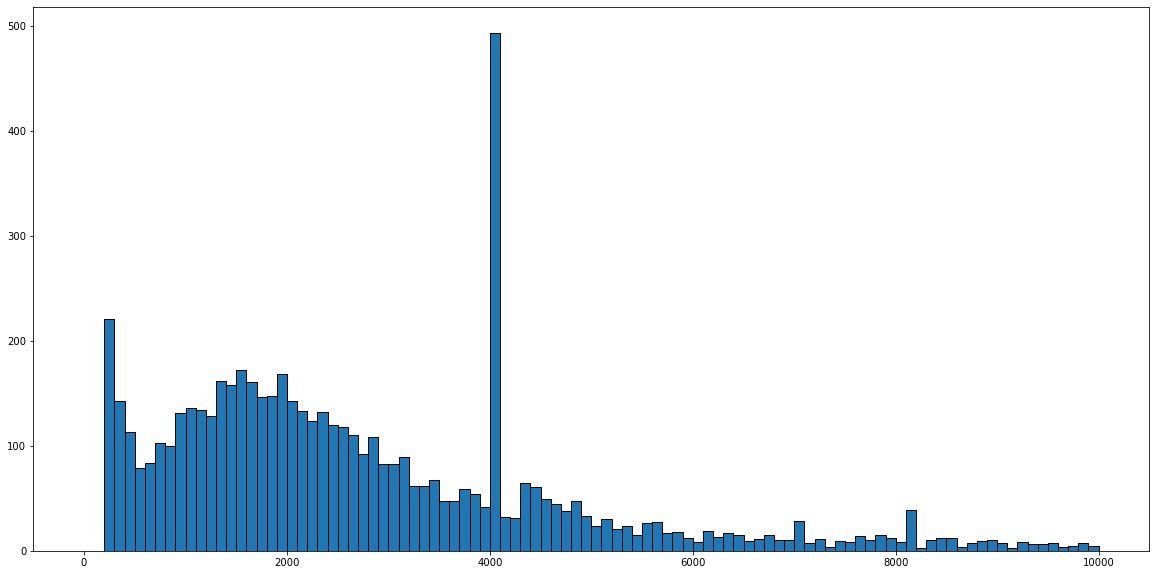

In [4]:
fig = plt.figure(figsize = (20,10))
_=plt.hist(cmos['sum'], 100, range = [0, 10000], edgecolor = 'black', linewidth = 1, density = False)

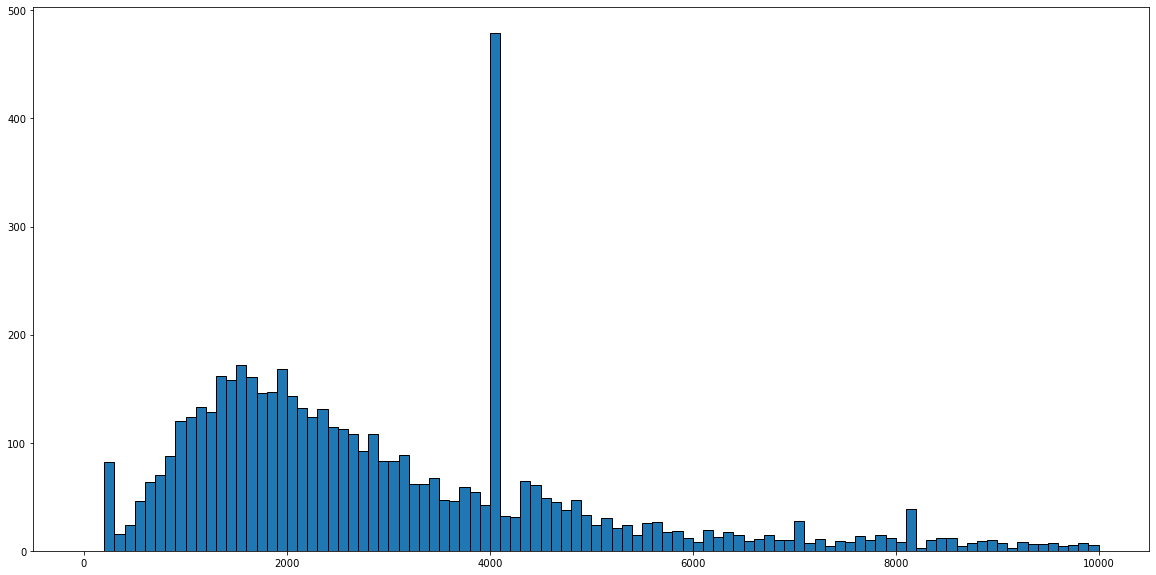

In [5]:
fig = plt.figure(figsize = (20,10))
_=plt.hist(cmos['sum'], 100, range = [0, 10000], edgecolor = 'black', linewidth = 1, density = False)

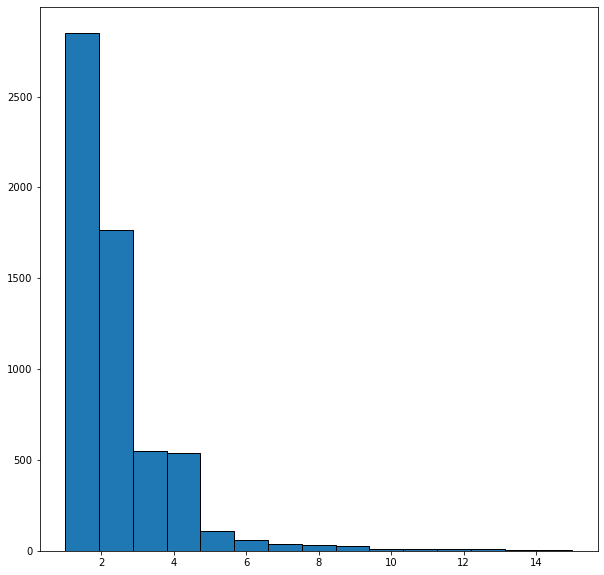

In [9]:
fig = plt.figure(figsize = (10,10))
_=plt.hist([val for val in cmos['size']], 15, range = [1,15], edgecolor = 'black', linewidth = 1, density = False)

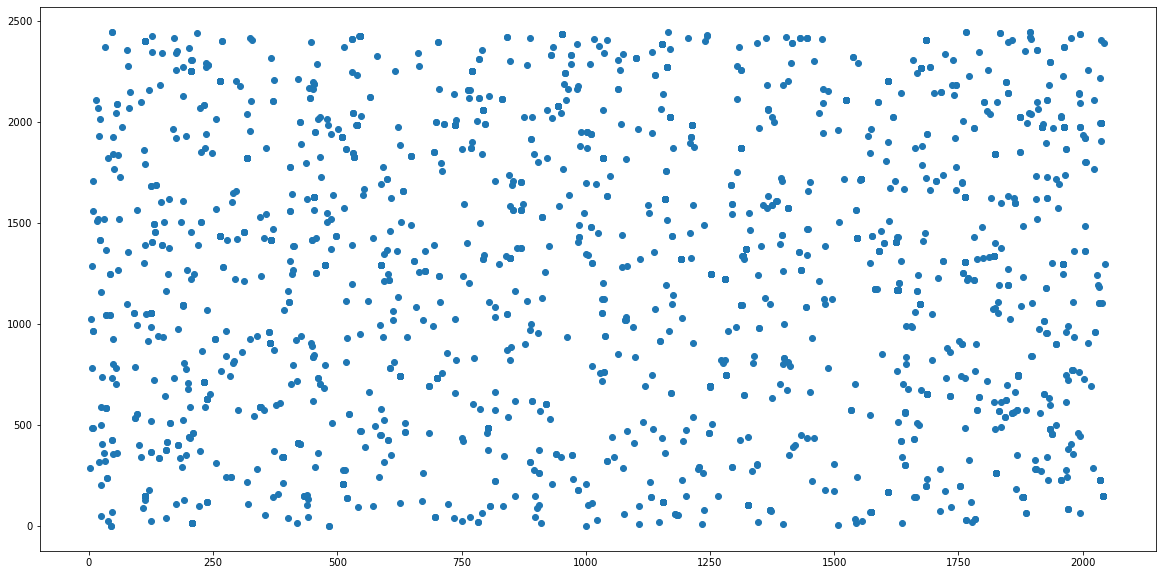

In [84]:
fig = plt.figure(figsize = (20,10))
plt.scatter([val[0] for bal in cmos for val in bal['pos']], [val[1] for bal in cmos for val in bal['pos']])

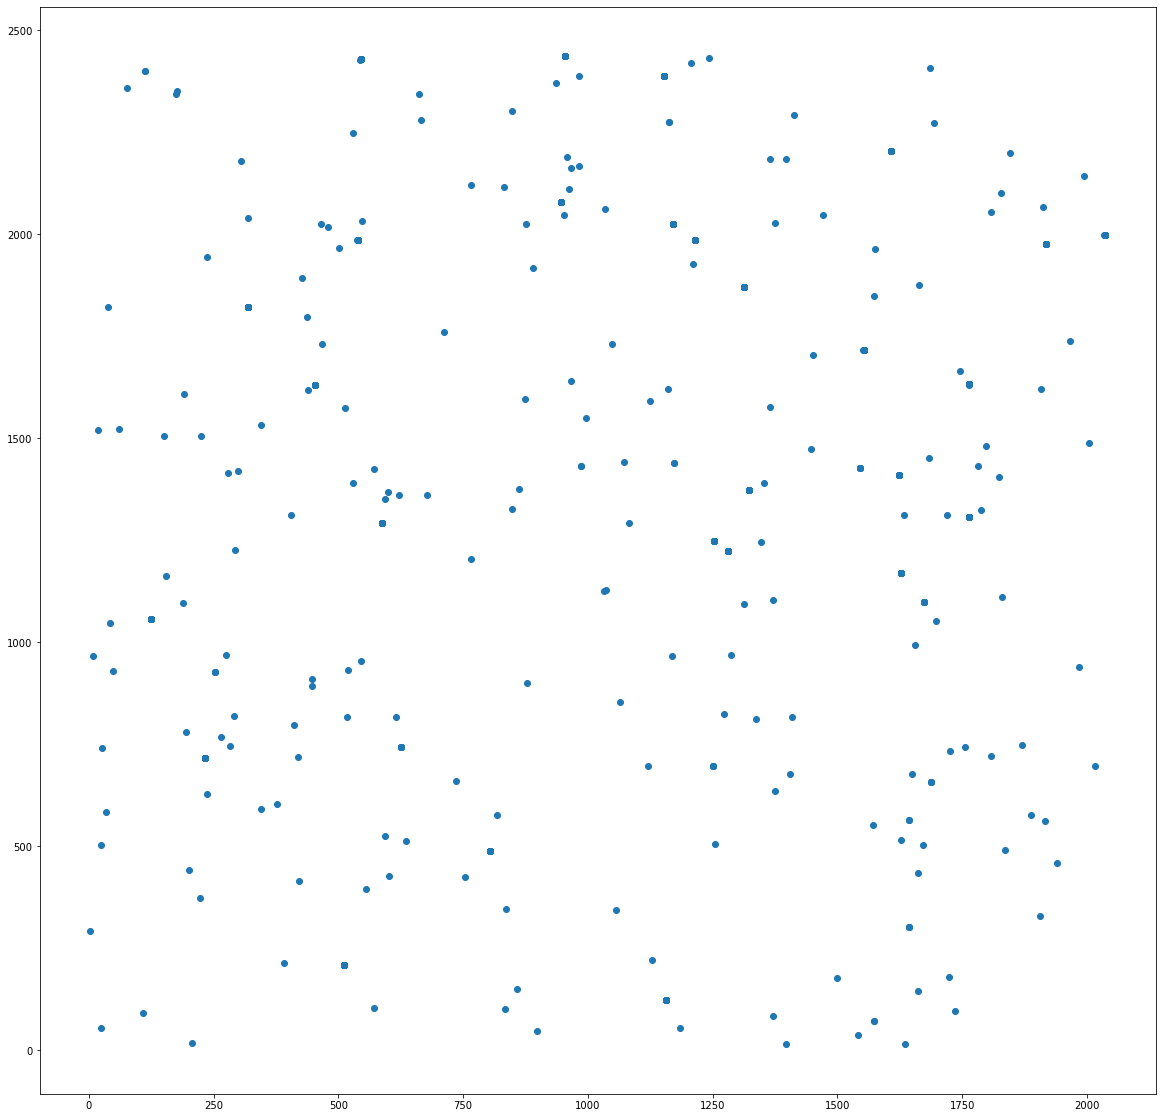

In [66]:
fig = plt.figure(figsize = (20,20))
plt.scatter([val[0] for bal in cmos for val in bal.pos], [val[1] for bal in cmos for val in bal.pos])

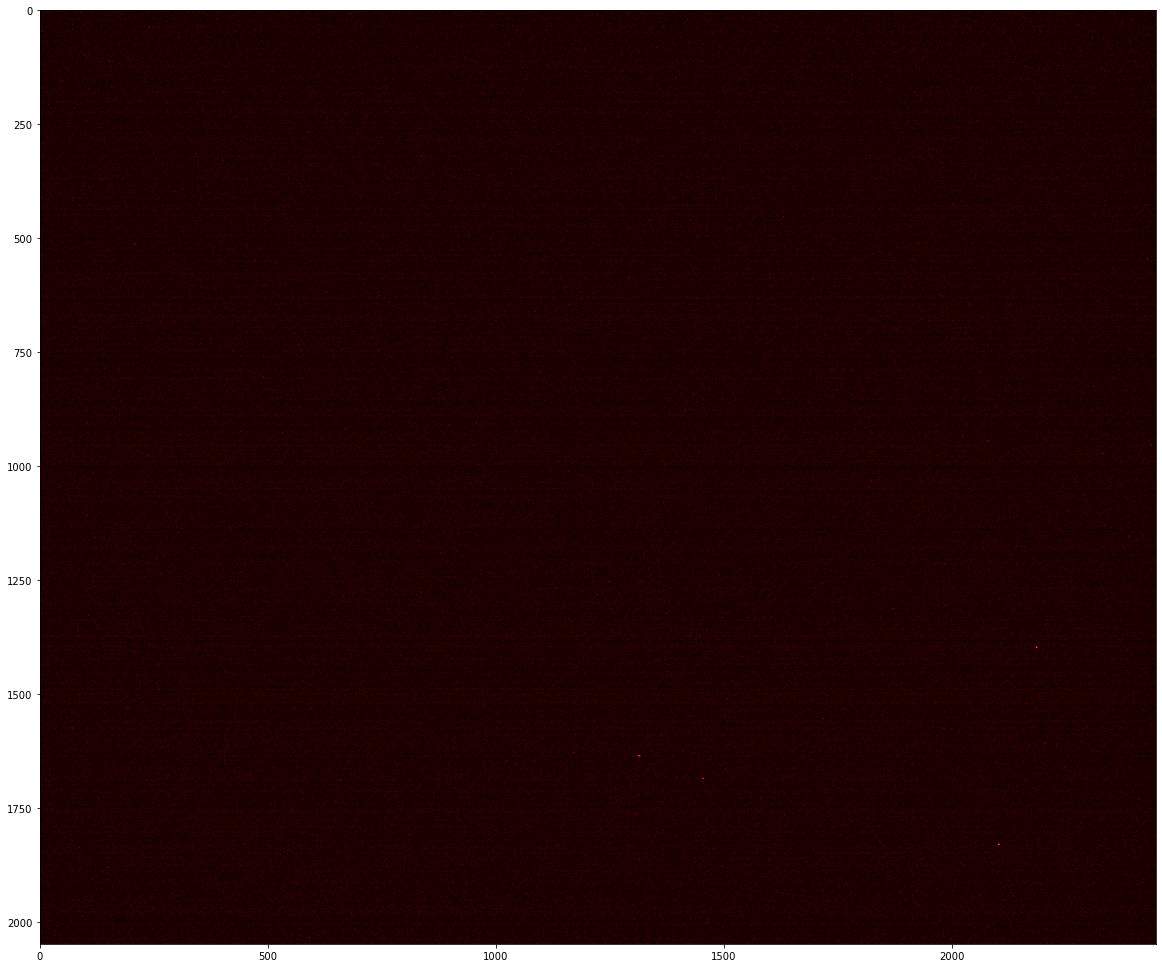

In [69]:
Im = Image.open(fl[12])
arr = np.array(Im)
thresh = np.average(arr) + 2*np.std(arr)
#arr[arr < thresh] = 0
arr[arr > 300] = 300
#arr = [[val*10 for val in bal] for bal in arr]
#arr[arr > 0] = 100
fig = plt.figure(figsize = (20,20))
plt.imshow(arr, cmap = 'hot')

In [199]:
Im = Image.open(fl[0])
arr = np.array(Im)
len([val for bal in arr for val in bal if val > 100])

871